In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [2]:
# Input variables
ped_distance = ctrl.Antecedent(np.arange(0, 101, 1), 'ped_distance')  # in meters
ped_movement = ctrl.Antecedent(np.arange(0, 3, 1), 'ped_movement')    # 0: Stationary, 1: Walking, 2: Running
vehicle_speed = ctrl.Antecedent(np.arange(0, 121, 1), 'vehicle_speed')  # in km/h

In [3]:
# Output variables
deceleration = ctrl.Consequent(np.arange(0, 11, 1), 'deceleration')  # 0 to 10 units
warning_signal = ctrl.Consequent(np.arange(0, 11, 1), 'warning_signal')  # 0 to 10 (intensity)

In [9]:
# Membership functions for pedestrian distance
ped_distance['close'] = fuzz.trimf(ped_distance.universe, [0, 0, 30])
ped_distance['medium'] = fuzz.trimf(ped_distance.universe, [20, 50, 80])
ped_distance['far'] = fuzz.trimf(ped_distance.universe, [60, 100, 100])

# Membership functions for pedestrian movement
ped_movement['stationary'] = fuzz.trimf(ped_movement.universe, [0, 0, 0])
ped_movement['walking'] = fuzz.trimf(ped_movement.universe, [1, 1, 1])
ped_movement['running'] = fuzz.trimf(ped_movement.universe, [2, 2, 2])

# Membership functions for vehicle speed
vehicle_speed['slow'] = fuzz.trimf(vehicle_speed.universe, [0, 0, 50])
vehicle_speed['normal'] = fuzz.trimf(vehicle_speed.universe, [30, 60, 90])
vehicle_speed['fast'] = fuzz.trimf(vehicle_speed.universe, [70, 120, 120])

# Membership functions for deceleration
deceleration['low'] = fuzz.trimf(deceleration.universe, [1, 2, 4])
deceleration['moderate'] = fuzz.trimf(deceleration.universe, [2, 5, 7])
deceleration['high'] = fuzz.trimf(deceleration.universe, [6, 10, 10])

# Membership functions for warning signal
warning_signal['off'] = fuzz.trimf(warning_signal.universe, [0, 0, 2])
warning_signal['low'] = fuzz.trimf(warning_signal.universe, [2, 5, 7])
warning_signal['high'] = fuzz.trimf(warning_signal.universe, [6, 10, 10])

In [11]:
# Fuzzy rules
rule1 = ctrl.Rule(ped_distance['close'] & ped_movement['walking'],
                  consequent=[deceleration['moderate'], warning_signal['high']])

rule2 = ctrl.Rule(ped_movement['stationary'],
                  consequent=[deceleration['none'], warning_signal['off']])
rule3 = ctrl.Rule(ped_distance['close'] & ped_movement['running'] & vehicle_speed['fast'],
                  consequent=[deceleration['high'], warning_signal['high']])

rule4 = ctrl.Rule(ped_distance['close'] & ped_movement['running'] & vehicle_speed['normal'],
                  consequent=[deceleration['high'], warning_signal['high']])

rule5 = ctrl.Rule(ped_distance['close'] & ped_movement['stationary'],
                  consequent=[deceleration['none'], warning_signal['low']])

rule6 = ctrl.Rule(ped_distance['medium'] & ped_movement['walking'] & vehicle_speed['fast'],
                  consequent=[deceleration['moderate'], warning_signal['low']])

rule7 = ctrl.Rule(ped_distance['medium'] & ped_movement['walking'] & vehicle_speed['slow'],
                  consequent=[deceleration['low'], warning_signal['low']])

rule8 = ctrl.Rule(ped_distance['medium'] & ped_movement['running'] & vehicle_speed['fast'],
                  consequent=[deceleration['high'], warning_signal['high']])

rule9 = ctrl.Rule(ped_distance['medium'] & ped_movement['stationary'],
                  consequent=[deceleration['none'], warning_signal['off']])

rule10 = ctrl.Rule(ped_distance['far'] & ped_movement['walking'] & vehicle_speed['fast'],
                   consequent=[deceleration['moderate'], warning_signal['low']])

rule11 = ctrl.Rule(ped_distance['far'] & ped_movement['running'] & vehicle_speed['fast'],
                   consequent=[deceleration['moderate'], warning_signal['low']])

rule12 = ctrl.Rule(ped_distance['far'] & ped_movement['stationary'],
                   consequent=[deceleration['none'], warning_signal['off']])


In [12]:
# Create control system
pedestrian_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
pedestrian_sim = ctrl.ControlSystemSimulation(pedestrian_ctrl)

In [13]:
# Set input values
pedestrian_sim.input['ped_distance'] = 15  # Close
pedestrian_sim.input['ped_movement'] = 1   # Walking
pedestrian_sim.input['vehicle_speed'] = 60 # Normal

Recommended Deceleration: 4.61
Warning Signal Intensity: 8.44


c:\Users\Aryan Pratik\Desktop\py\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


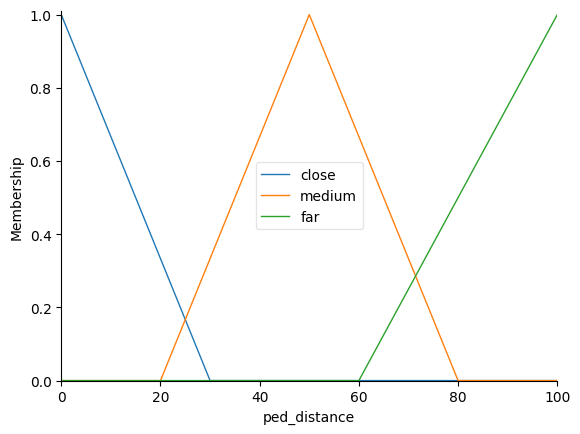

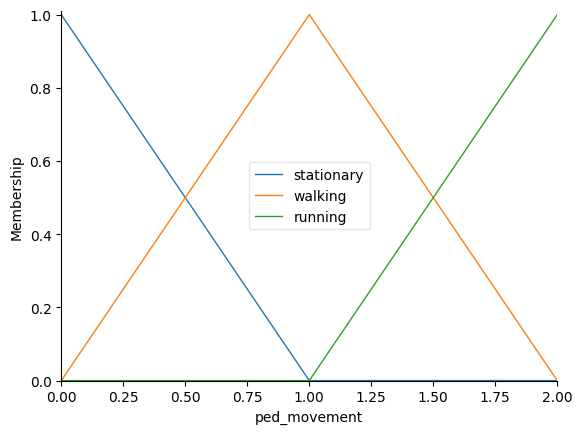

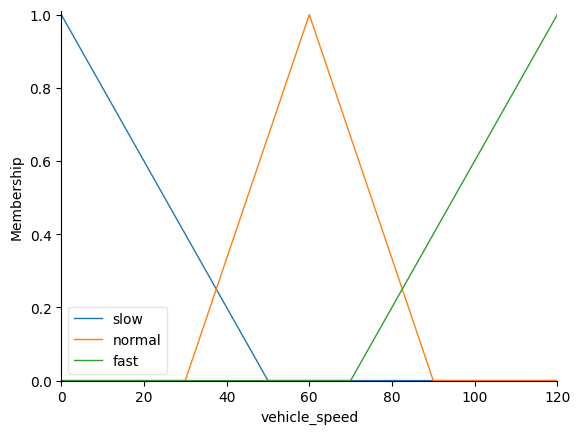

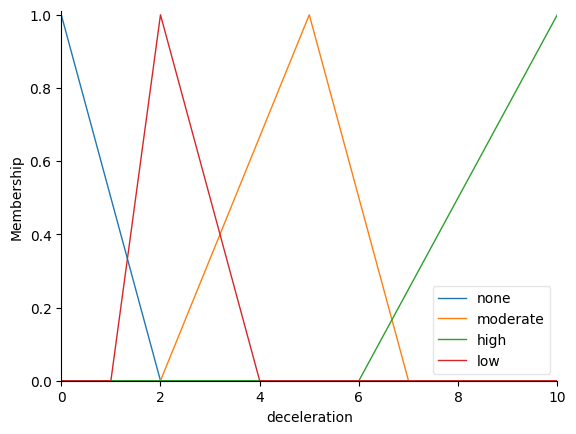

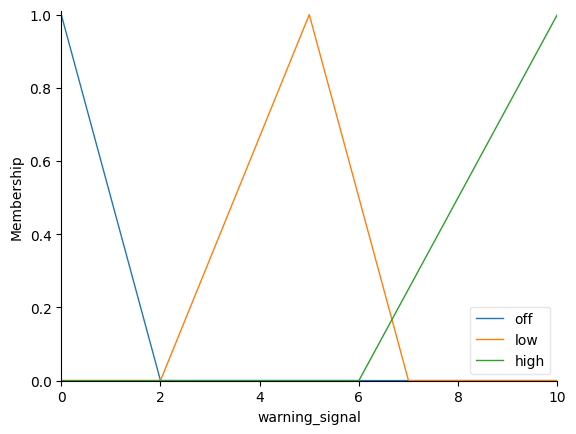

In [14]:
# Compute output
pedestrian_sim.compute()

# Display results
print(f"Recommended Deceleration: {pedestrian_sim.output['deceleration']:.2f}")
print(f"Warning Signal Intensity: {pedestrian_sim.output['warning_signal']:.2f}")

# Visualize membership functions
ped_distance.view()
ped_movement.view()
vehicle_speed.view()
deceleration.view()
warning_signal.view()
plt.show()